Assignment - Step 1
-----
-----

Authors:
--------
Ana Rita Silva - 1211152

Jorge Cruz - 1221715

--------

This project focuses on the analysis of a dataset containing detailed metadata and audio features from a large collection of music tracks. 

The main objective of this analysis is to explore, model, and understand how these audio characteristics relate to the popularity and categorization of music tracks. To achieve that, we perfomed data exploration, preprocessing, and applied multiple machine learning methods, including regression, classification and feature selection, evaluating their perfomance using appropriate metrics.



# 1. Exploratory Data Analysis of Data (EDA)
---
Before starting to use the data assigned, was made an exploratory analysis to obtain more information from the dataset 


In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import math

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, scale, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import r2_score


import warnings

### Loading the dataset

In [2]:
df = pd.read_csv ('group_2.csv')
df

duration_1  duration_2  duration_3  duration_4  duration_5  \
0            0.0         1.0         0.0         0.0         0.0   
1            0.0         0.0         1.0         0.0         0.0   
2            0.0         1.0         0.0         0.0         0.0   
3            0.0         0.0         0.0         1.0         0.0   
4            0.0         0.0         0.0         1.0         0.0   
...          ...         ...         ...         ...         ...   
2995         0.0         0.0         0.0         1.0         0.0   
2996         0.0         1.0         0.0         0.0         0.0   
2997         0.0         1.0         0.0         0.0         0.0   
2998         0.0         0.0         1.0         0.0         0.0   
2999         0.0         0.0         1.0         0.0         0.0   

      loudness_level  popularity_level  tempo_class  time_signature  key_mode  \
0                0.0               4.0          1.0        0.221824  0.767388   
1                0.0               4.0          1.0        0.221824  0.767388   
2                1.0               4.0          1.0        0.221824 -0.104926   
3                3.0               4.0          1.0        0.221824  0.457857   
4                2.0               0.0          1.0        0.221824 -0.076786   
...              ...               ...          ...             ...       ...   
2995             0.0               3.0          1.0        0.221824  1.048779   
2996             2.0               3.0          1.0        0.221824 -1.483743   
2997             1.0               1.0          1.0        0.221824 -0.076786   
2998             2.0               3.0          1.0        0.221824  1.048779   
2999             3.0               4.0          1.0        0.221824 -0.076786   

      ...  is_instrumental  is_dance_hit  temp_zscore  resonance_factor  \
0     ...              0.0           0.0    -0.905245         -1.980572   
1     ...              0.0           0.0    -0.739191         -1.054986   
2     ...              0.0           0.0    -0.905178         -0.587028   
3     ...              0.0           0.0     0.196552          0.149669   
4     ...              0.0           0.0    -0.670542          1.024162   
...   ...              ...           ...          ...               ...   
2995  ...              0.0           0.0     0.829977         -0.431444   
2996  ...              0.0           0.0     1.161284          1.679747   
2997  ...              0.0           0.0    -0.575973          0.636232   
2998  ...              0.0           0.0     0.815700          0.810224   
2999  ...              0.0           0.0    -0.405116          0.326853   

      timbre_index  echo_constant  distorted_movement  signal_power  \
0         0.173606              1           -0.857433         0.524   
1         0.354575              1           -1.727539         0.716   
2         0.753432              1           -0.102572         0.597   
3         0.484375              1           -0.684564         0.965   
4         0.319093              1           -0.396449         0.667   
...            ...            ...                 ...           ...   
2995      0.713162              1            0.617714         0.974   
2996      0.528833              1            0.928878         0.635   
2997      0.645590              1           -0.609654         0.709   
2998      0.263591              1            1.643402         0.759   
2999      0.310374              1           -0.794048         0.650   

      target_class  target_regression  
0         class_31           2.275790  
1         class_31           2.275790  
2         class_31           2.051623  
3         class_31           2.903456  
4         class_31           1.558457  
...            ...                ...  
2995     class_108           0.123792  
2996     class_108           0.123792  
2997     class_108           0.078959  
2998     class_108           0.123792  
2999     class_108    

### First 5 rows of the dataset

In [3]:
df.head()

duration_1  duration_2  duration_3  duration_4  duration_5  loudness_level  \
0         0.0         1.0         0.0         0.0         0.0             0.0   
1         0.0         0.0         1.0         0.0         0.0             0.0   
2         0.0         1.0         0.0         0.0         0.0             1.0   
3         0.0         0.0         0.0         1.0         0.0             3.0   
4         0.0         0.0         0.0         1.0         0.0             2.0   

   popularity_level  tempo_class  time_signature  key_mode  ...  \
0               4.0          1.0        0.221824  0.767388  ...   
1               4.0          1.0        0.221824  0.767388  ...   
2               4.0          1.0        0.221824 -0.104926  ...   
3               4.0          1.0        0.221824  0.457857  ...   
4               0.0          1.0        0.221824 -0.076786  ...   

   is_instrumental  is_dance_hit  temp_zscore  resonance_factor  timbre_index  \
0              0.0           0.0    -0.905245         -1.980572      0.173606   
1              0.0           0.0    -0.739191         -1.054986      0.354575   
2              0.0           0.0    -0.905178         -0.587028      0.753432   
3              0.0           0.0     0.196552          0.149669      0.484375   
4              0.0           0.0    -0.670542          1.024162      0.319093   

   echo_constant  distorted_movement  signal_power  target_class  \
0              1           -0.857433         0.524      class_31   
1              1           -1.727539         0.716      class_31   
2              1           -0.102572         0.597      class_31   
3              1           -0.684564         0.965      class_31   
4              1           -0.396449         0.667      class_31   

   target_regression  
0           2.275790  
1           2.275790  
2           2.051623  
3           2.903456  
4           1.558457  

[5 rows x 49 columns]

### Last 5 rows of the dataset

In [4]:
df.tail()

duration_1  duration_2  duration_3  duration_4  duration_5  \
2995         0.0         0.0         0.0         1.0         0.0   
2996         0.0         1.0         0.0         0.0         0.0   
2997         0.0         1.0         0.0         0.0         0.0   
2998         0.0         0.0         1.0         0.0         0.0   
2999         0.0         0.0         1.0         0.0         0.0   

      loudness_level  popularity_level  tempo_class  time_signature  key_mode  \
2995             0.0               3.0          1.0        0.221824  1.048779   
2996             2.0               3.0          1.0        0.221824 -1.483743   
2997             1.0               1.0          1.0        0.221824 -0.076786   
2998             2.0               3.0          1.0        0.221824  1.048779   
2999             3.0               4.0          1.0        0.221824 -0.076786   

      ...  is_instrumental  is_dance_hit  temp_zscore  resonance_factor  \
2995  ...              0.0           0.0     0.829977         -0.431444   
2996  ...              0.0           0.0     1.161284          1.679747   
2997  ...              0.0           0.0    -0.575973          0.636232   
2998  ...              0.0           0.0     0.815700          0.810224   
2999  ...              0.0           0.0    -0.405116          0.326853   

      timbre_index  echo_constant  distorted_movement  signal_power  \
2995      0.713162              1            0.617714         0.974   
2996      0.528833              1            0.928878         0.635   
2997      0.645590              1           -0.609654         0.709   
2998      0.263591              1            1.643402         0.759   
2999      0.310374              1           -0.794048         0.650   

      target_class  target_regression  
2995     class_108           0.123792  
2996     class_108           0.123792  
2997     class_108           0.078959  
2998     class_108           0.123792  
2999     class_108           1.917123  

[5 rows x 49 columns]

### Information about the dataset dimension (shape and size)

In [5]:
shape = df.shape
size = df.size
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])
print('Size of the dataset: ', size)

Number of rows:  3000
Number of columns:  49
Size of the dataset:  147000


### Checking what columns the dataset contains

In [6]:
all_columns = df.columns
print(all_columns)

Index(['duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5',
       'loudness_level', 'popularity_level', 'tempo_class', 'time_signature',
       'key_mode', 'artist_song_count', 'album_freq', 'movement_index',
       'intensity_level', 'verbal_density', 'purity_score', 'positivity_index',
       'activity_rate', 'loudness_intensity', 'happy_dance',
       'acoustics_instrumental', 'artists_avg_popularity', 'tempo_vs_genre',
       'energy_rank_pct', 'loud_energy_ratio', 'mood_pca', 'mood_cluster',
       'acoustic_valence_mood_cluster', 'explicit', 'signal_strength',
       'mode_indicator', 'focus_factor', 'ambient_level', 'key_sin', 'key_cos',
       'duration_log', 'duration_log_z', 'time_signature_class_boolean',
       'loudness_yeo', 'is_instrumental', 'is_dance_hit', 'temp_zscore',
       'resonance_factor', 'timbre_index', 'echo_constant',
       'distorted_movement', 'signal_power', 'target_class',
       'target_regression'],
      dtype='object')


### Checking the type of the columns 

In [7]:
sum_str, sum_int, sum_float = 0, 0, 0

print("Categorical variables: ")
for column in df.columns:
    if df[column].dtype == 'object': 
        sum_str+=1
        print(df[column])
    elif df[column].dtype == 'int64': sum_int+=1
    elif df[column].dtype == 'float64': sum_float+=1

print()
print(f'The set contains: \n {sum_str} categorical; \n {sum_int} descrete; \n {sum_float} continuous.')



Categorical variables: 
0            0.0
1       2.63e-05
2            0.0
3       7.07e-06
4          0.053
          ...   
2995    0.000128
2996    0.000106
2997    0.000709
2998         0.0
2999    6.59e-05
Name: focus_factor, Length: 3000, dtype: object
0        class_31
1        class_31
2        class_31
3        class_31
4        class_31
          ...    
2995    class_108
2996    class_108
2997    class_108
2998    class_108
2999    class_108
Name: target_class, Length: 3000, dtype: object

The set contains: 
 2 categorical; 
 1 descrete; 
 46 continuous.


A coluna "focus_factor" é referenciada como object. No entanto, o seu tipo de dados é numérico pelo que procedemos à sua conversão para formato float.


(fazer o drop de linhas duplicadas? fazer drop de colunas?)

In [8]:
df['focus_factor'] = pd.to_numeric(df['focus_factor'], errors='coerce')
df['focus_factor']

0       0.000000
1       0.000026
2       0.000000
3       0.000007
4       0.053000
          ...   
2995    0.000128
2996    0.000106
2997    0.000709
2998    0.000000
2999    0.000066
Name: focus_factor, Length: 3000, dtype: float64

In [13]:
goal_attributes = ['target_class', 'target_regression']
#Predictors are all numeric
predictors = all_columns.drop(goal_attributes)

--------------------
## Descriptive statistics
--------------------

In [39]:
df.describe(include='all').T

count unique       top  freq      mean  \
duration_1                     2995.0    NaN       NaN   NaN  0.028047   
duration_2                     2995.0    NaN       NaN   NaN  0.105175   
duration_3                     2995.0    NaN       NaN   NaN  0.280134   
duration_4                     2995.0    NaN       NaN   NaN  0.583306   
duration_5                     2995.0    NaN       NaN   NaN  0.003339   
loudness_level                 2995.0    NaN       NaN   NaN  1.639065   
popularity_level               2995.0    NaN       NaN   NaN  1.529883   
tempo_class                    2995.0    NaN       NaN   NaN  1.020367   
time_signature                 2995.0    NaN       NaN   NaN  0.013442   
key_mode                       2995.0    NaN       NaN   NaN   0.05286   
artist_song_count              2995.0    NaN       NaN   NaN -0.127541   
album_freq                     2995.0    NaN       NaN   NaN  0.058786   
movement_index                 2995.0    NaN       NaN   NaN -0.367608   
intensity_level                2995.0    NaN       NaN   NaN  0.363177   
verbal_density                 2995.0    NaN       NaN   NaN   0.05843   
purity_score                   2995.0    NaN       NaN   NaN -0.498726   
positivity_index               2995.0    NaN       NaN   NaN -0.268968   
activity_rate                  2995.0    NaN       NaN   NaN -0.045605   
loudness_intensity             2995.0    NaN       NaN   NaN -0.134408   
happy_dance                    2995.0    NaN       NaN   NaN -0.287925   
acoustics_instrumental         2995.0    NaN       NaN   NaN  -0.28524   
artists_avg_popularity         2995.0    NaN       NaN   NaN -0.232458   
tempo_vs_genre                 2995.0    NaN       NaN   NaN -0.000193   
energy_rank_pct                2995.0    NaN       NaN   NaN  0.525514   
loud_energy_ratio              2995.0    NaN       NaN   NaN -0.009321   
mood_pca                       2995.0    NaN       NaN   NaN -0.008029   
mood_cluster                   2995.0    NaN       NaN   NaN  0.050352   
acoustic_valence_mood_cluster  2995.0    NaN       NaN   NaN -0.216605   
explicit                       2995.0    NaN       NaN   NaN  0.117195   
signal_strength                2995.0    NaN       NaN   NaN  0.767575   
mode_indicator                 2995.0    NaN       NaN   NaN   0.62571   
focus_factor                   2995.0    NaN       NaN   NaN   0.20056   
ambient_level                  2995.0    NaN       NaN   NaN  0.221751   
key_sin                        2995.0    NaN       NaN   NaN -0.051556   
key_cos                        2995.0    NaN       NaN   NaN  0.012878   
duration_log                   2995.0    NaN       NaN   NaN  1.335264   
duration_log_z                 2995.0    NaN       NaN   NaN  -0.65121   
time_signature_class_boolean   2995.0    NaN       NaN   NaN  0.968948   
loudness_yeo                   2995.0    NaN       NaN   NaN  0.349465   
is_instrumental                2995.0    NaN       NaN   NaN  0.136561   
is_dance_hit                   2995.0    NaN       NaN   NaN       0.0   
temp_zscore                    2995.0    NaN       NaN   NaN -0.045605   
resonance_factor               2995.0    NaN       NaN   NaN  0.029327   
timbre_index                   2995.0    NaN       NaN   NaN   0.49492   
echo_constant                  2995.0    NaN       NaN   NaN       1.0   
distorted_movement             2995.0    NaN       NaN   NaN  0.006493   
signal_power                   2995.0    NaN       NaN   NaN  0.767575   
target_class                     2995      3  class_43  1000       NaN   
target_regression              2995.0    NaN       NaN   NaN -0.191972   

                                    std       min       25%       50%  \
duration_1                     0.165134       0.0       0.0       0.0   
duration_2                      0.30683       0.0       0.0       0.0   
duration_3                     0.449139       0.0       0.0       0.0   
duration_4                     0.493094

1. *duration_1*
   - Mean: 2.8% -> only 2.8% of the tracks fall into the duration, meaning songs of this lenght are very rare in the dataset.
   - Its a binary variable (0/1), the low std (0,165) confirms that 1’s ate rare outliers.

2. *duration_2*
    - Mean: 10.5% / std: 0.307, around 10.5% of the tracks belong to this duration category.
    - There's some variation, but it's still a minor group overall

3. *duration_3*
    - Mean: 28% / std: 0.0449, roughly 28% og the tracks have this duration.

4. *duration_4*
    - Mean: 58.3% / std: 0.493, over half of the songs fall into this duration range.
    - It's the most typical song length on the dataset and represents the standard duration for most of the trhacks.

5. *duration_5*
    - Mean: 0.3% / std: 0.058, virtually no songs have this duration. It's an extremely rare length in the dataset.

6. *loudness_level*
    - Mean: 1.64 / std: 1.37, the average perceived loudness is slightly below moderate,
    - The large standard deviation shows that the dataset mixes both quiet and loud songs, suggesting diverse mastering levels.

7. *Popularity_level*
    - Mean: 1.53 / std: 1.05, songs tend to be midly popular, cluestering around level 1-2 (on a 0-4 scale).
      
8. *tempo_class*
    - Mean: 1.02 /std: 0.26,the average tempo is moderate, and the low std means most trachks have similar tempo.
    - The dataset focuses on mid-tempo tracks rather than extremes.

9. *time_signature*
    - Mean: 0.014 / std: 1.04

10. *key_mode*
    - Mean: 0.05 / std: 0.99, theres a balanced mix of major and minor modes.
    - std close to 1, indicates healthy harmonic variety.

11. *artist_song_count*
    - Mean: -0.13 / std:1.00, artists in this dataset have slightly fewer songs that the typical artist in the reference population. 

#### Data types and Missing Values

In [22]:
data_info = pd.DataFrame({
    'Data type': df.dtypes,
    'Missing Values': df.isna().sum(),  #confirmar se é isna() ou isnull()
    'Unique Values': df.nunique()
})

data_info

Data type  Missing Values  Unique Values
duration_1                      float64               0              2
duration_2                      float64               0              2
duration_3                      float64               0              2
duration_4                      float64               0              2
duration_5                      float64               0              2
loudness_level                  float64               0              5
popularity_level                float64               0              5
tempo_class                     float64               0              4
time_signature                  float64               0              4
key_mode                        float64               0             24
artist_song_count               float64               0             48
album_freq                      float64               0             78
movement_index                  float64               0            725
intensity_level                 float64               0           2204
verbal_density                  float64               0            855
purity_score                    float64               0           1791
positivity_index                float64               0           1028
activity_rate                   float64               0           2457
loudness_intensity              float64               0           2550
happy_dance                     float64               0           2538
acoustics_instrumental          float64               0           1864
artists_avg_popularity          float64               0            341
tempo_vs_genre                  float64               0           2532
energy_rank_pct                 float64               0            659
loud_energy_ratio               float64               0           2551
mood_pca                        float64               0           2560
mood_cluster                    float64               0             10
acoustic_valence_mood_cluster   float64               0             11
explicit                        float64               0              2
signal_strength                 float64               0            659
mode_indicator                  float64               0              2
focus_factor                    float64               5           1348
ambient_level                   float64               0            856
key_sin                         float64               0             11
key_cos                         float64               0             11
duration_log                    float64               0           2459
duration_log_z                  float64               0           2459
time_signature_class_boolean    float64               0              2
loudness_yeo                    float64               0           2204
is_instrumental                 float64               0              2
is_dance_hit                    float64               0              1
temp_zscore                     float64               0           2457
resonance_factor                float64               0           3000
timbre_index                    float64               0           3000
echo_constant                     int64               0              1
distorted_movement              float64               0            735
signal_power                    float64               0            659
target_class                     object               0              3
target_regression               float64               0             86

A feature 'focus_factor' tem 5 valores nulos (NaN) como pode ser verificado de seguida. Tratando-se de um número muito baixo de linhas do dataframe, estes serão eliminados.

In [25]:
df.loc[df['focus_factor'].isna(), ['focus_factor']]

focus_factor
67             NaN
244            NaN
534            NaN
783            NaN
2719           NaN

In [41]:
initial_rows = df.shape[0]
df = df.dropna(subset=['focus_factor'])
final_rows = df.shape[0]

print(f"Linhas removidas: {initial_rows - final_rows}")

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Linhas removidas: 0
Number of duplicate rows: 0


### Univariate analysis

#### Numeric Predictors

In [15]:
# Preparar o estilo de visualização
sns.set(style="whitegrid")

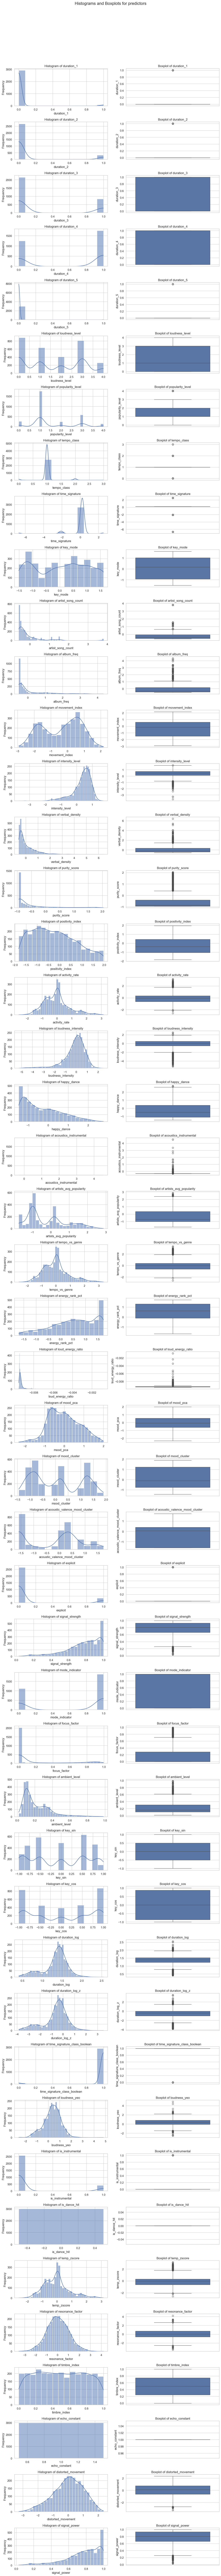

In [42]:
#Plot Histogram and Boxplot for predictors
fig, axe = plt.subplots(nrows = len(predictors), ncols = 2, figsize = (12, 3*len(predictors)))
fig.suptitle('Histograms and Boxplots for predictors', fontsize=16)

for i, col in enumerate(predictors):
    sns.histplot(df[col], ax=axe[i,0], kde = True)
    axe[i, 0].set_title(f"Histogram of {col}")
    axe[i, 0].set_xlabel(col)
    axe[i, 0].set_ylabel("Frequency")
        
    sns.boxplot(y=df[col], ax=axe[i, 1])
    axe[i, 1].set_title(f"Boxplot of {col}")
    axe[i, 1].set_ylabel(col)
    
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### Target Regression Analysis

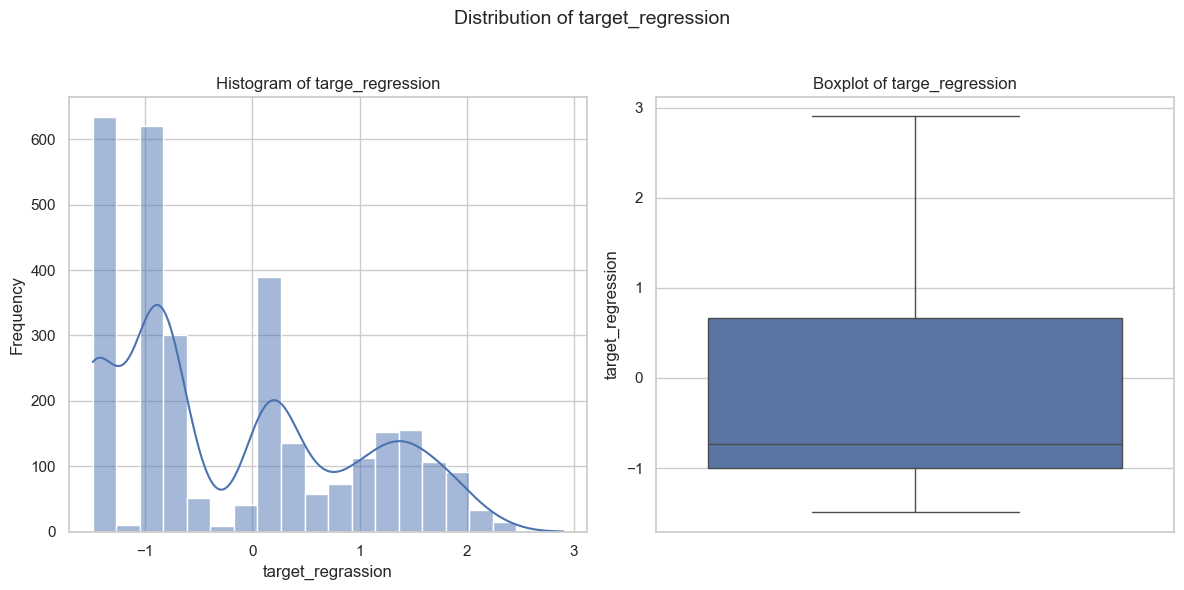

In [47]:
fig, axe = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

sns.histplot(df['target_regression'], ax=axe[0], kde = True)
axe[0].set_title("Histogram of targe_regression")
axe[0].set_xlabel('target_regrassion')
axe[0].set_ylabel("Frequency")

sns.boxplot(y=df['target_regression'], ax=axe[1])
axe[1].set_title("Boxplot of targe_regression")
axe[1].set_ylabel('target_regression')


fig.suptitle("Distribution of target_regression", fontsize=14)

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### Target Class Analysis

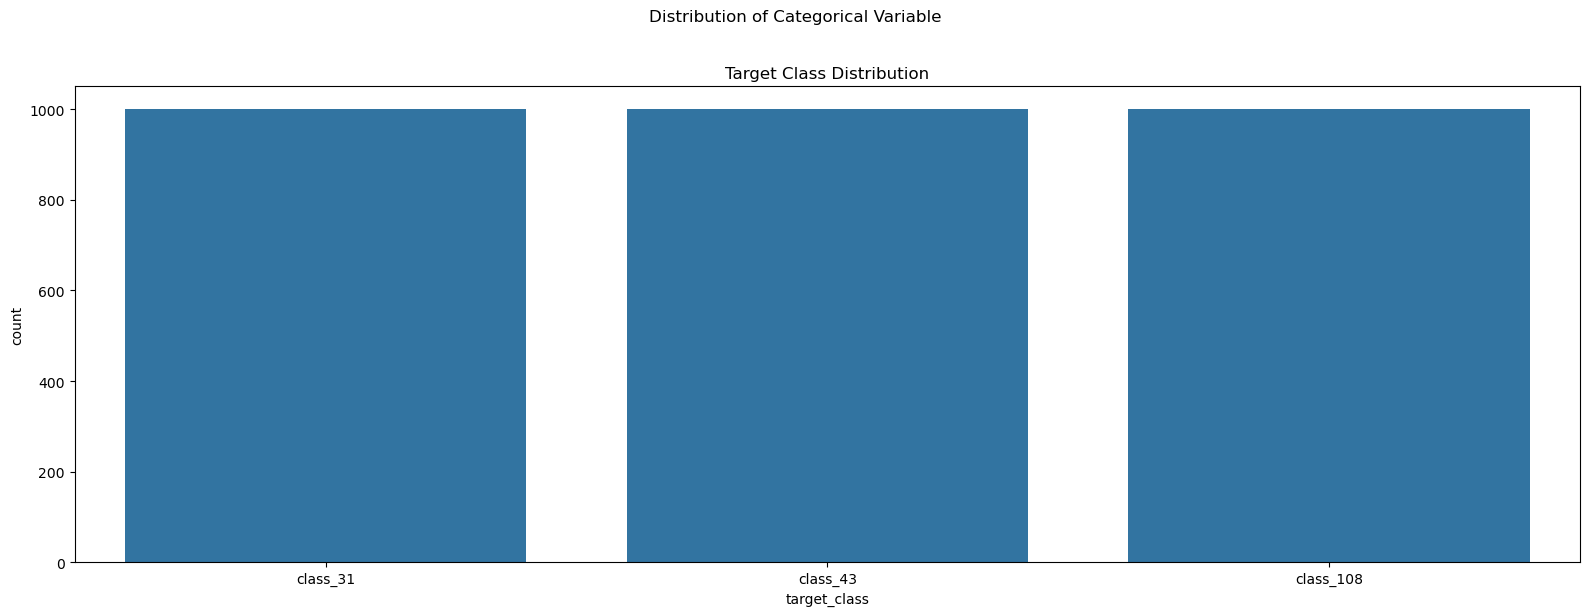

In [11]:
fig, ax = plt.subplots(figsize=(16, 6))
fig.suptitle('Distribution of Categorical Variable', y=1.02)

sns.countplot(x='target_class', data=df, ax=ax)
ax.set_title('Target Class Distribution')

fig.tight_layout()
plt.show()

### Univariate analysis (Distribution of features)
1. *duration_1; duration_2; duration_3; duration_4; duration_5*
   - As variáveis de duração apresentam valores essencialmente binários. As variáveis duration_1; duration_2; duration_3 e duration_5 apresentam uma distribuição fortemente assimétrica à direita, mostrando que a sua presença no dataset é inferior à variável duration_4.


#### Bivariate Analysis

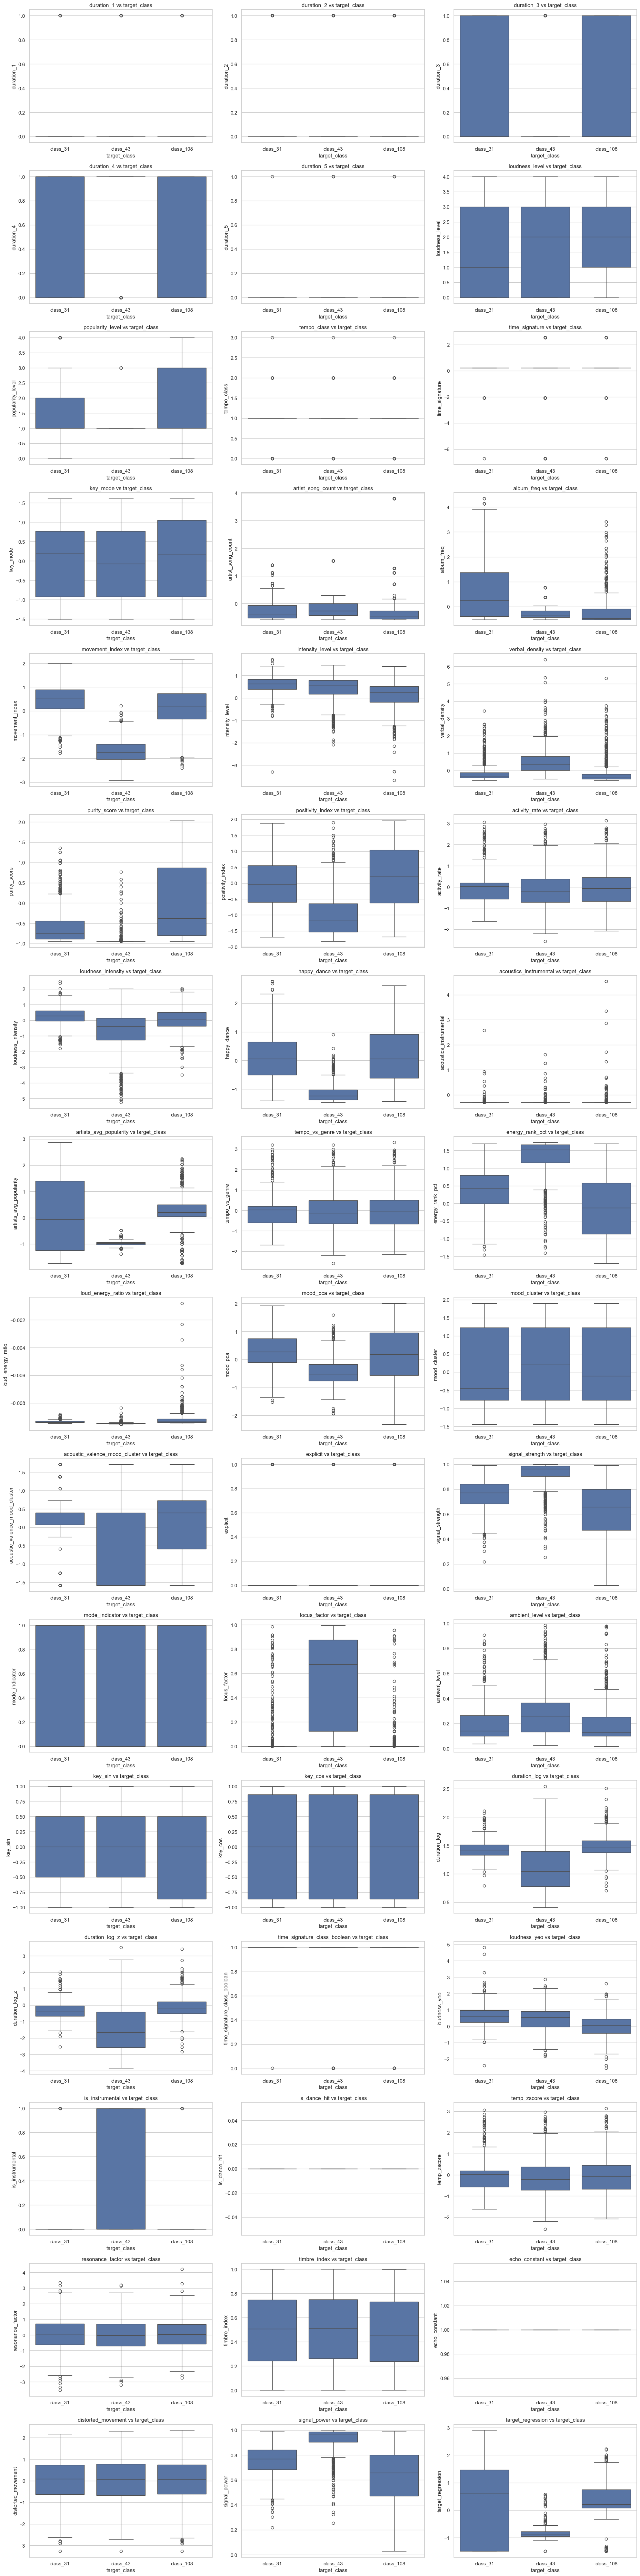

In [48]:
# Seleção das colunas com features numéricas
features = df.select_dtypes(include=['float64', 'int64']).columns


#gerar scatterplots entre a variável alvo "Target_class", e as features numéricas
plt.figure(figsize=(20,80))
for i, column in enumerate(features, 1):
    plt.subplot(16, 3, i)
    sns.boxplot(x='target_class', y=column, data=df)
    plt.title(f'{column} vs target_class')

plt.tight_layout()
plt.show()

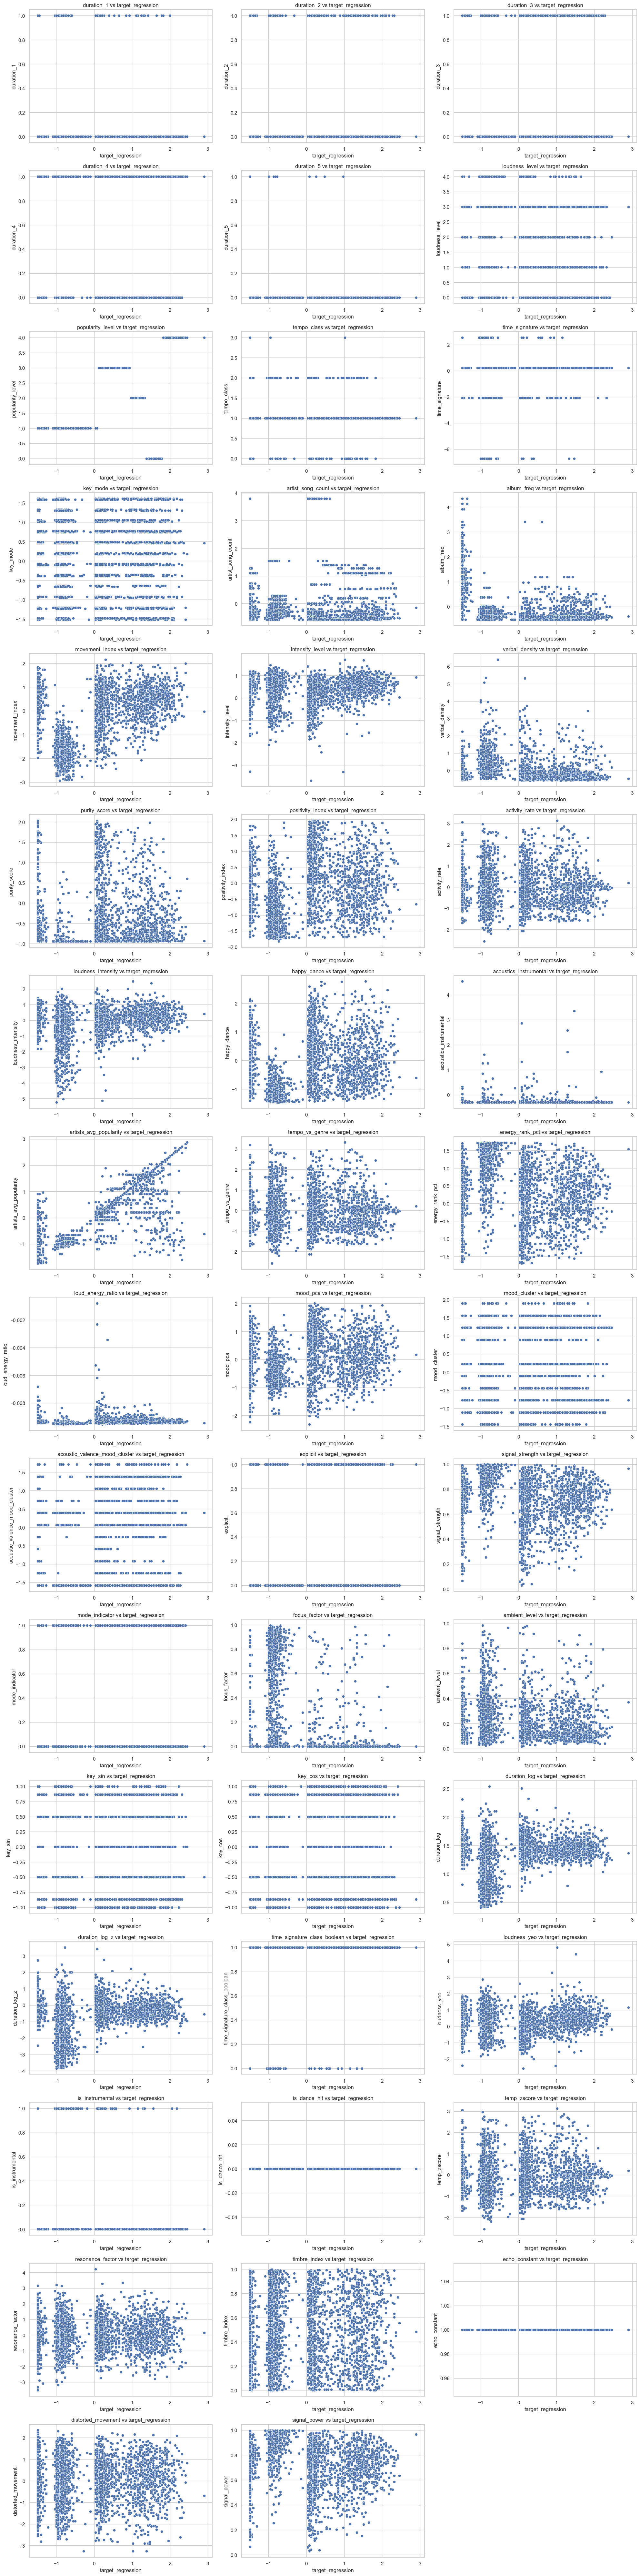

In [49]:
#gerar scatterplots entre a variável alvo "Target_regression", e as features numéricas
plt.figure(figsize=(20,80))
for i, column in enumerate(predictors, 1):
    plt.subplot(16, 3, i)
    sns.scatterplot(x='target_regression', y=column, data=df)
    plt.title(f'{column} vs target_regression')

plt.tight_layout()
plt.show()

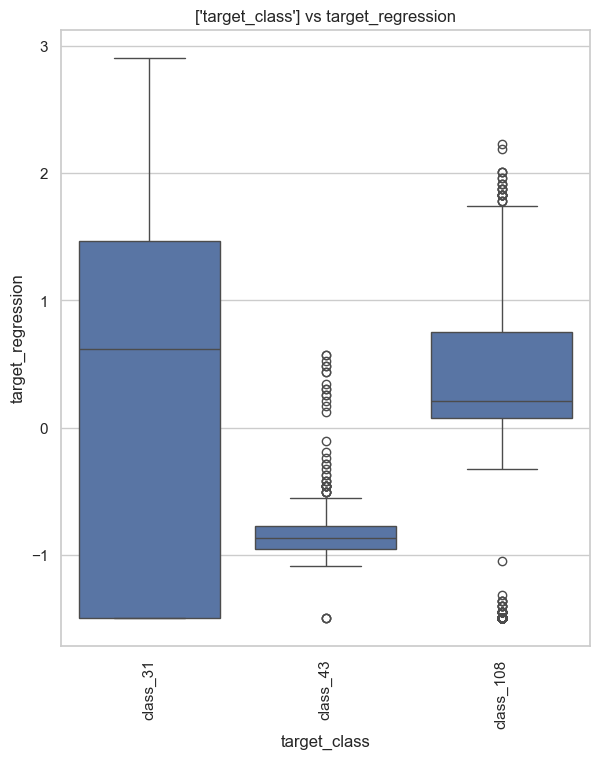

In [50]:
#boxplots para as variáveis categóricas relacionadas com a variável "target_regression"
catg_columns = ['target_class']

plt.figure(figsize=(15, 8))
for i, col in enumerate (catg_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=col, y='target_regression', data=df)
    plt.title(f'{catg_columns} vs target_regression')
    plt.xticks(rotation=90)

#### Interpretation of the Boxplot: target_class vs target_regression

*Median:*
- class_31: around 0.6/0.7, indicating positive values;
- class_43: around -0.9, meaning that the values are typically negatives;
- class_108: around 0.2/0.3, indicating very low positive values.


*IQR:*
- class_31: Large IQR -> high variability; 
- class_43: Small IQR -> distribution higlhy concentrated; 
- class_108: Moderate IQR -> intermidiate level of variability.


*Outliers:*
- class_31: Shows the highest maximum values, reaching close to 3. 
- class_43: Contains less negative outliers, however, the majority of the values are negative.
- class_108: Includes both negative outliers and a few positive.


Conclusion: 
The Boxplot suggests a clear relationship between targe_class and target_regression. Class_43 tends to have the lowest regression values, while class_31 has the highest and most variable values.
These differences indicat that the target_regression variable is influenced by the target_class category.

### Methods Application - Regression


#### Simple Linear Regression


Feature: duration_1
Slope: [-0.03730948]
Intercept: [-0.18539525]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.22
R2-score: -0.00


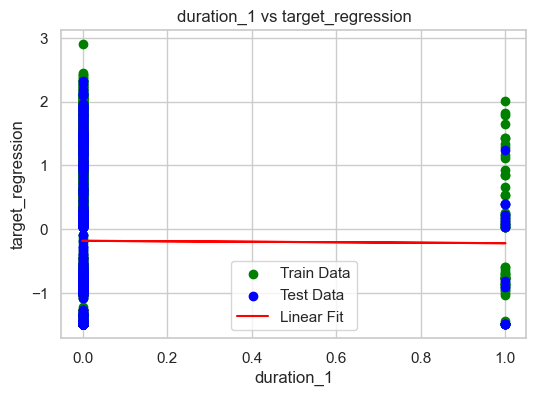


Feature: duration_2
Slope: [0.06941174]
Intercept: [-0.19387257]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.22
R2-score: 0.00


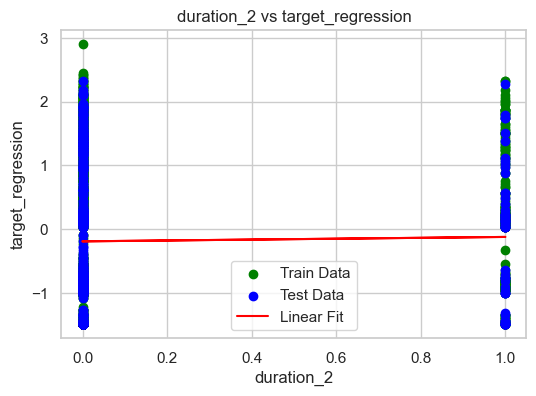


Feature: duration_3
Slope: [0.3974749]
Intercept: [-0.29647101]
Mean absolute error: 0.94
Residual sum of squares (MSE): 1.18
R2-score: 0.03


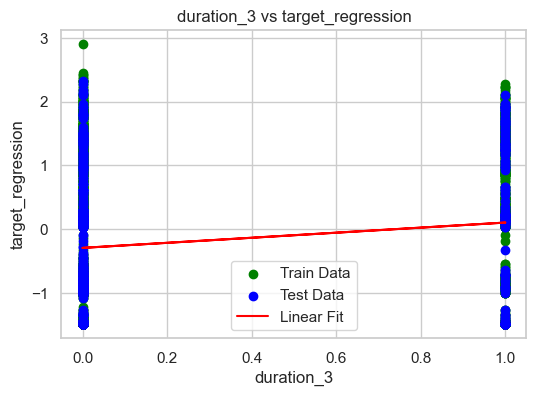


Feature: duration_4
Slope: [-0.34546517]
Intercept: [0.01551671]
Mean absolute error: 0.93
Residual sum of squares (MSE): 1.18
R2-score: 0.03


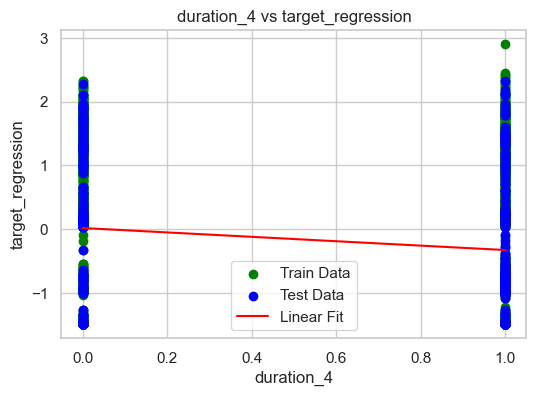


Feature: duration_5
Slope: [-0.41467094]
Intercept: [-0.18527378]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


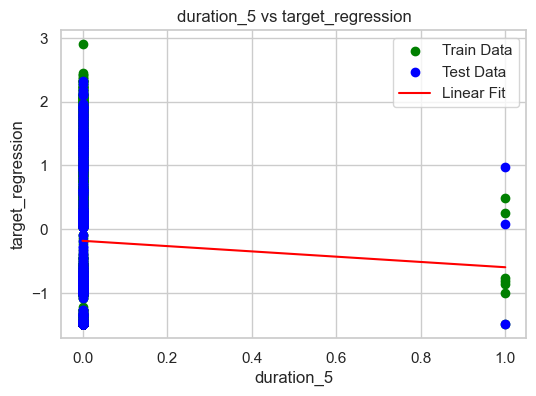


Feature: loudness_level
Slope: [-0.06700175]
Intercept: [-0.07787308]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.22
R2-score: 0.00


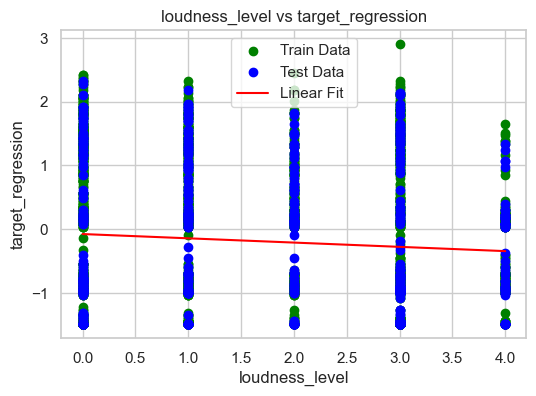


Feature: popularity_level
Slope: [0.45422728]
Intercept: [-0.88469855]
Mean absolute error: 0.81
Residual sum of squares (MSE): 1.04
R2-score: 0.15


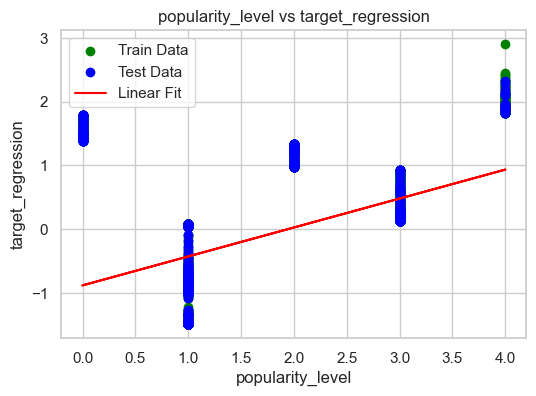


Feature: tempo_class
Slope: [-0.14645995]
Intercept: [-0.03654107]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.22
R2-score: -0.00


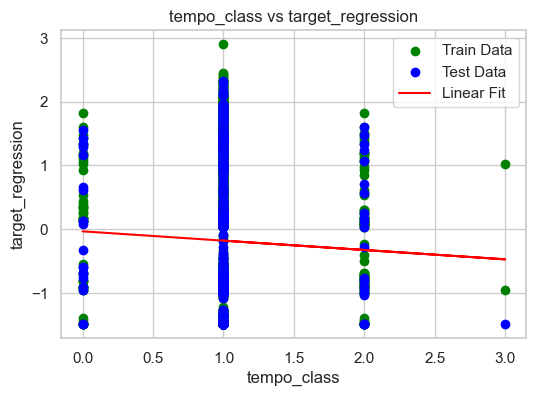


Feature: time_signature
Slope: [0.08537011]
Intercept: [-0.18730341]
Mean absolute error: 0.97
Residual sum of squares (MSE): 1.22
R2-score: 0.00


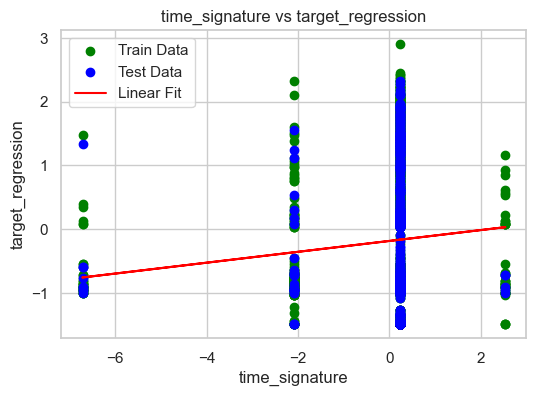


Feature: key_mode
Slope: [0.00418199]
Intercept: [-0.186743]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.22
R2-score: -0.00


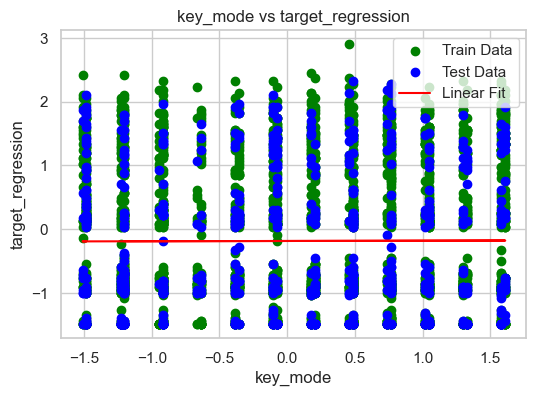


Feature: artist_song_count
Slope: [-0.10235205]
Intercept: [-0.19966974]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.22
R2-score: 0.01


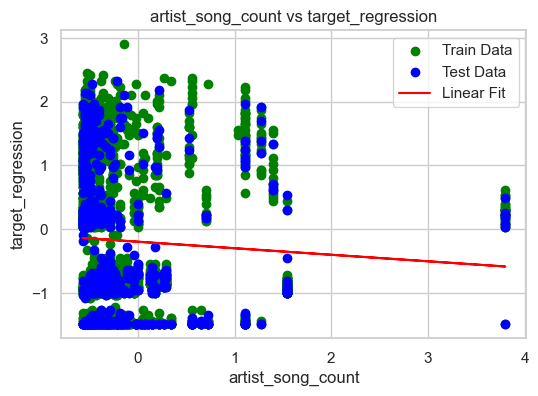


Feature: album_freq
Slope: [-0.60458556]
Intercept: [-0.15686835]
Mean absolute error: 0.81
Residual sum of squares (MSE): 0.93
R2-score: 0.24


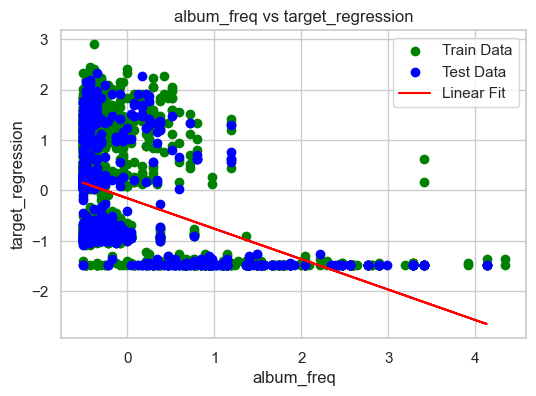


Feature: movement_index
Slope: [0.35096644]
Intercept: [-0.05156421]
Mean absolute error: 0.85
Residual sum of squares (MSE): 1.13
R2-score: 0.07


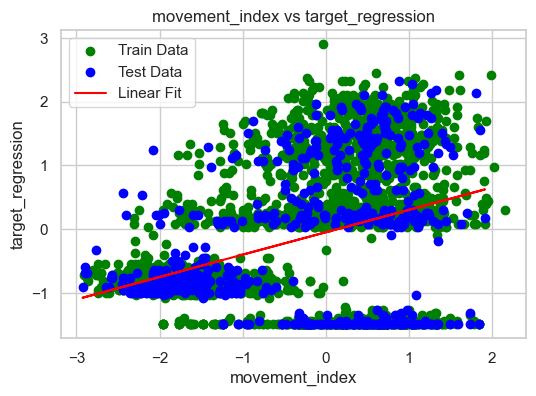


Feature: intensity_level
Slope: [0.07876353]
Intercept: [-0.21593103]
Mean absolute error: 0.99
Residual sum of squares (MSE): 1.23
R2-score: -0.01


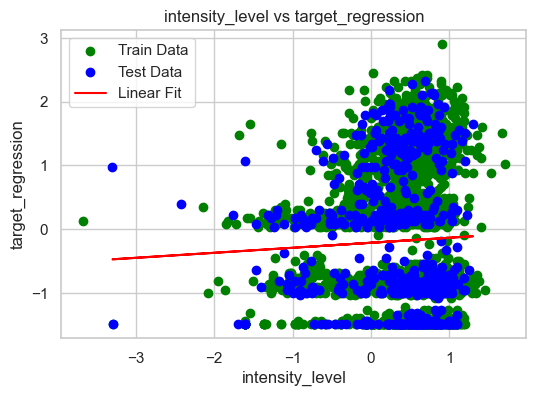


Feature: verbal_density
Slope: [-0.26911318]
Intercept: [-0.17222758]
Mean absolute error: 0.94
Residual sum of squares (MSE): 1.19
R2-score: 0.03


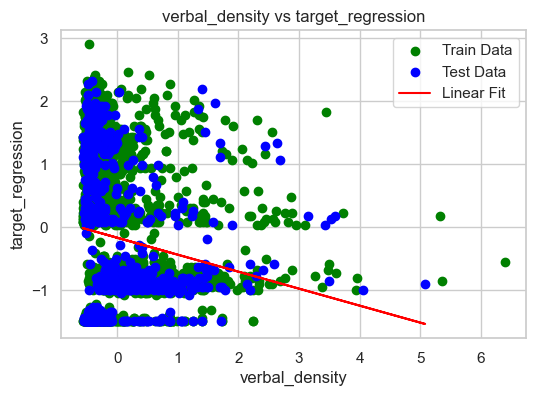


Feature: purity_score
Slope: [0.21027734]
Intercept: [-0.08025838]
Mean absolute error: 0.94
Residual sum of squares (MSE): 1.18
R2-score: 0.04


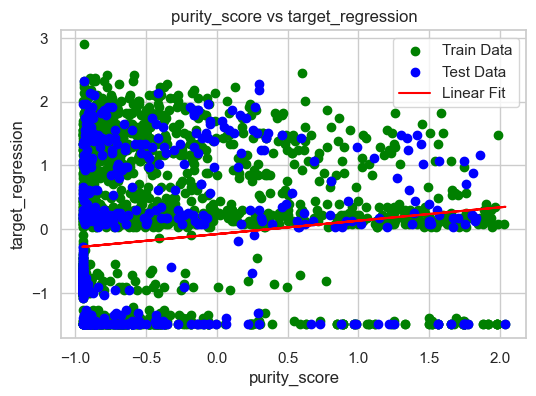


Feature: positivity_index
Slope: [0.23928766]
Intercept: [-0.1211653]
Mean absolute error: 0.90
Residual sum of squares (MSE): 1.16
R2-score: 0.05


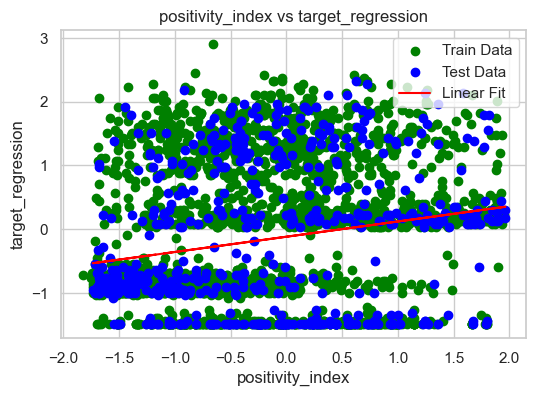


Feature: activity_rate
Slope: [0.04154022]
Intercept: [-0.18425449]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


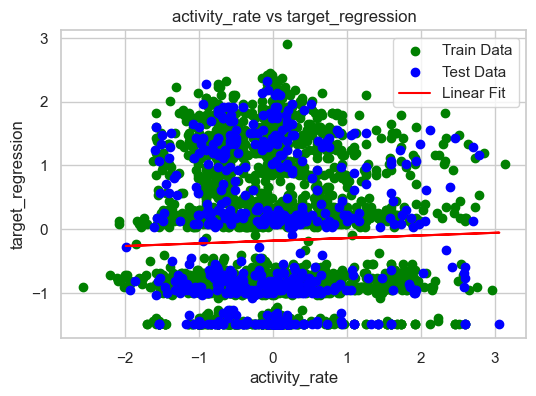


Feature: loudness_intensity
Slope: [0.18364964]
Intercept: [-0.16205306]
Mean absolute error: 0.96
Residual sum of squares (MSE): 1.21
R2-score: 0.01


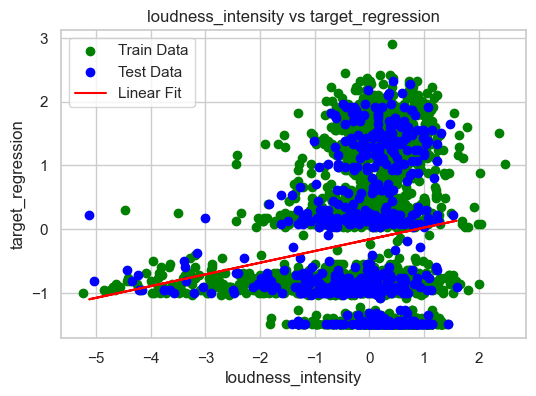


Feature: happy_dance
Slope: [0.30481546]
Intercept: [-0.09527409]
Mean absolute error: 0.89
Residual sum of squares (MSE): 1.15
R2-score: 0.06


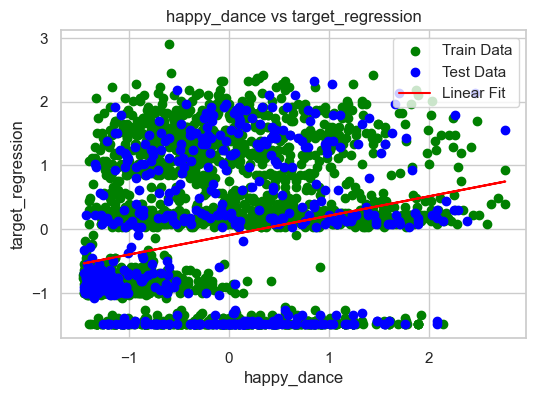


Feature: acoustics_instrumental
Slope: [0.09990597]
Intercept: [-0.15791713]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


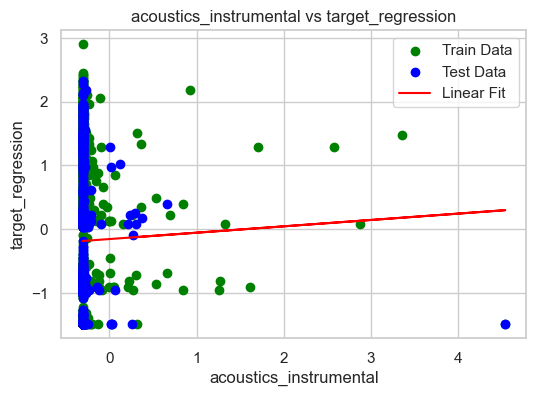


Feature: artists_avg_popularity
Slope: [0.86378772]
Intercept: [0.02153633]
Mean absolute error: 0.32
Residual sum of squares (MSE): 0.36
R2-score: 0.71


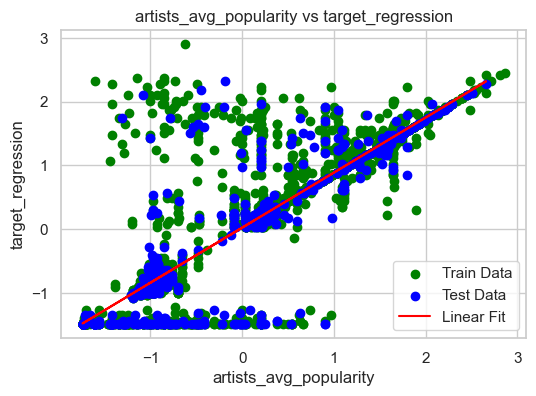


Feature: tempo_vs_genre
Slope: [0.01742843]
Intercept: [-0.18634346]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


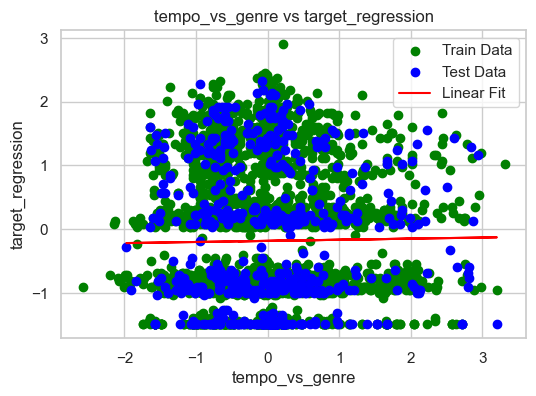


Feature: energy_rank_pct
Slope: [-0.30278681]
Intercept: [-0.02191457]
Mean absolute error: 0.89
Residual sum of squares (MSE): 1.12
R2-score: 0.08


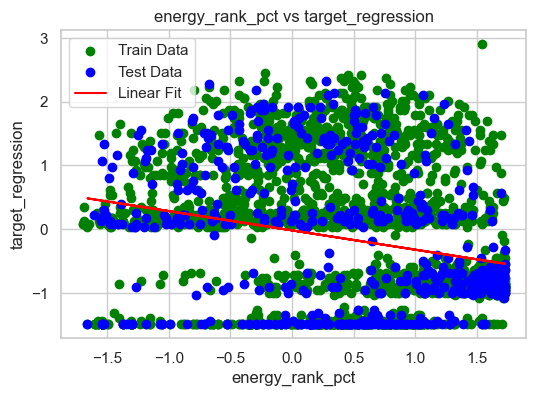


Feature: loud_energy_ratio
Slope: [135.25943259]
Intercept: [1.07447849]
Mean absolute error: 0.97
Residual sum of squares (MSE): 1.22
R2-score: 0.01


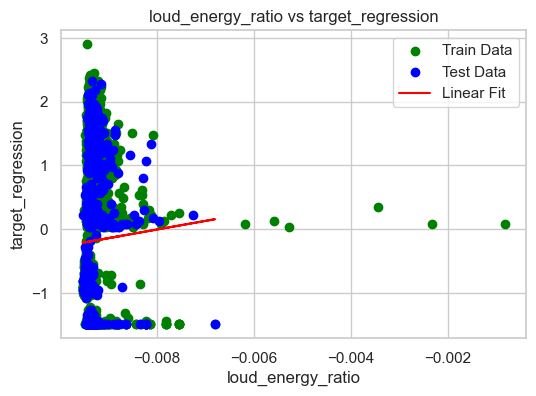


Feature: mood_pca
Slope: [0.24481796]
Intercept: [-0.18491305]
Mean absolute error: 0.94
Residual sum of squares (MSE): 1.20
R2-score: 0.02


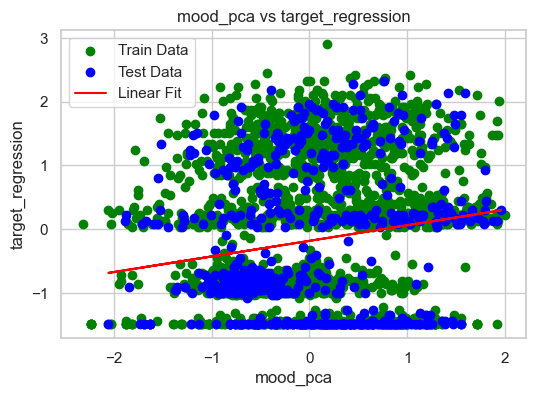


Feature: mood_cluster
Slope: [0.00039415]
Intercept: [-0.18650706]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


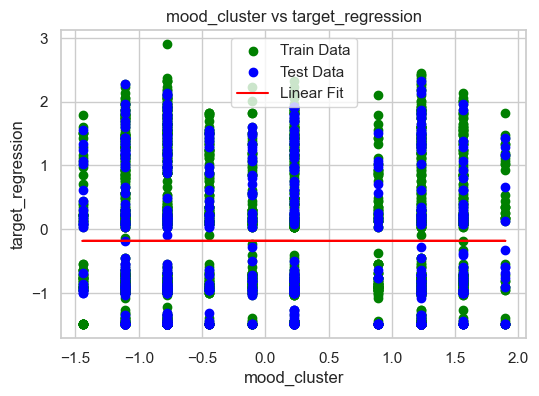


Feature: acoustic_valence_mood_cluster
Slope: [0.19678565]
Intercept: [-0.14422323]
Mean absolute error: 0.92
Residual sum of squares (MSE): 1.17
R2-score: 0.04


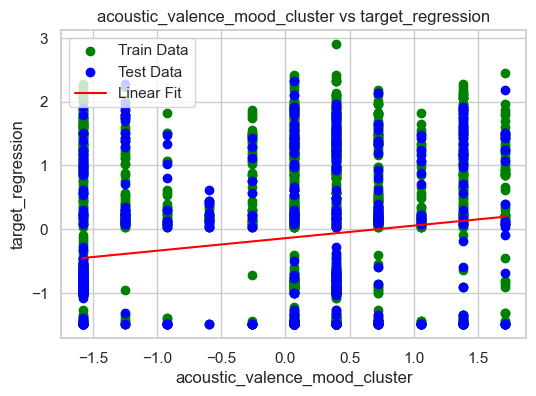


Feature: explicit
Slope: [-0.05745798]
Intercept: [-0.17960277]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.22
R2-score: -0.00


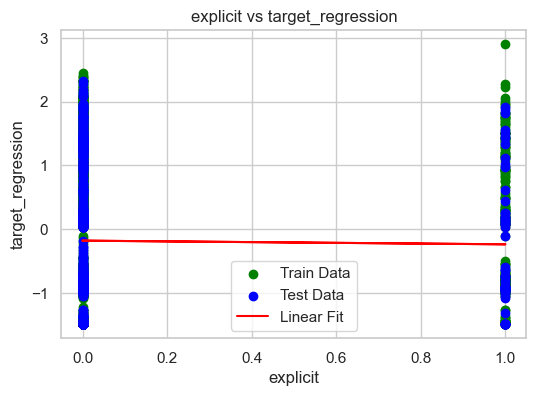


Feature: signal_strength
Slope: [-1.125669]
Intercept: [0.68198862]
Mean absolute error: 0.91
Residual sum of squares (MSE): 1.14
R2-score: 0.07


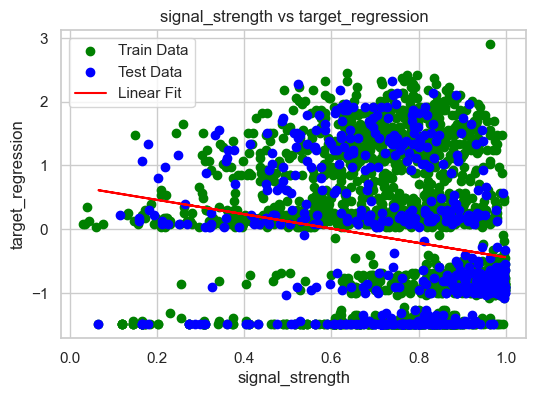


Feature: mode_indicator
Slope: [0.02346982]
Intercept: [-0.20110002]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.22
R2-score: 0.00


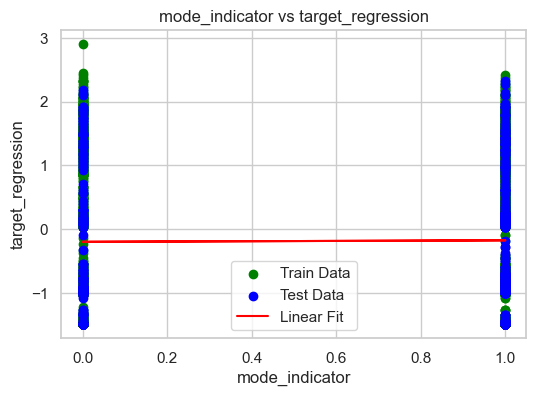


Feature: focus_factor
Slope: [-0.98347912]
Intercept: [0.01418179]
Mean absolute error: 0.87
Residual sum of squares (MSE): 1.14
R2-score: 0.07


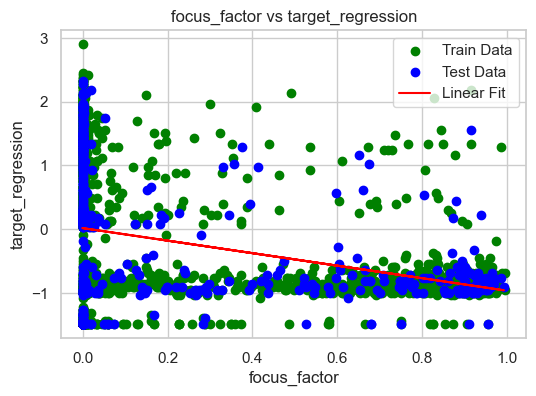


Feature: ambient_level
Slope: [-0.69186652]
Intercept: [-0.03180178]
Mean absolute error: 0.97
Residual sum of squares (MSE): 1.22
R2-score: 0.00


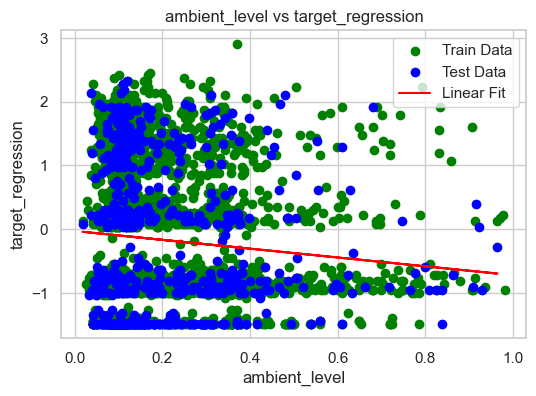


Feature: key_sin
Slope: [0.00697703]
Intercept: [-0.18610764]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


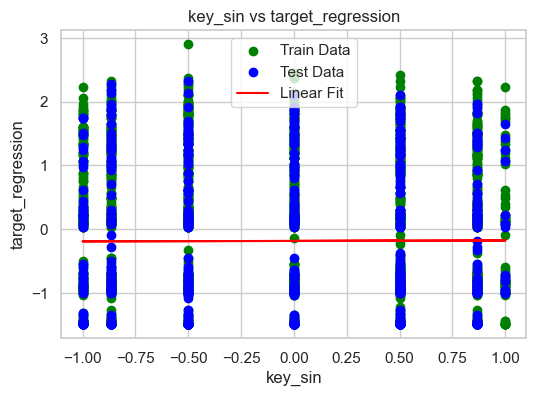


Feature: key_cos
Slope: [0.01191002]
Intercept: [-0.18671506]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


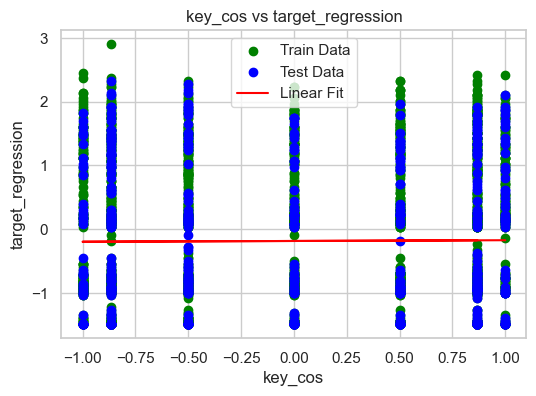


Feature: duration_log
Slope: [0.84599897]
Intercept: [-1.31624231]
Mean absolute error: 0.89
Residual sum of squares (MSE): 1.16
R2-score: 0.05


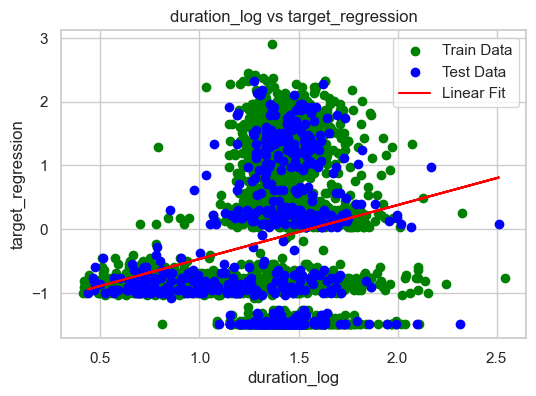


Feature: duration_log_z
Slope: [0.24509869]
Intercept: [-0.02699967]
Mean absolute error: 0.89
Residual sum of squares (MSE): 1.16
R2-score: 0.05


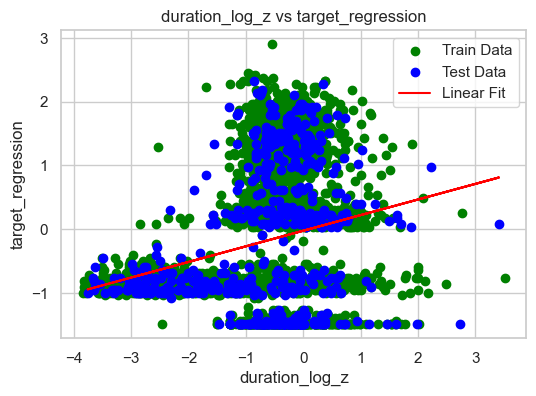


Feature: time_signature_class_boolean
Slope: [0.39804605]
Intercept: [-0.57140709]
Mean absolute error: 0.97
Residual sum of squares (MSE): 1.22
R2-score: 0.00


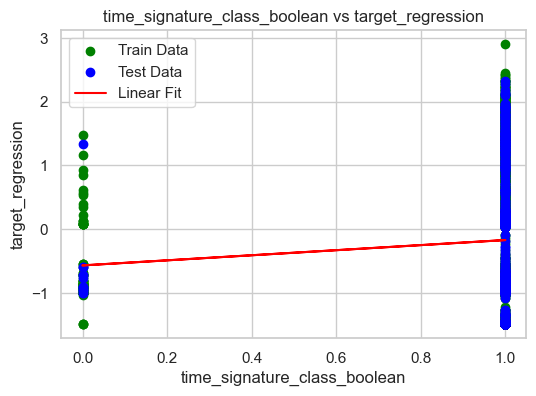


Feature: loudness_yeo
Slope: [0.04299583]
Intercept: [-0.20208506]
Mean absolute error: 0.99
Residual sum of squares (MSE): 1.23
R2-score: -0.01


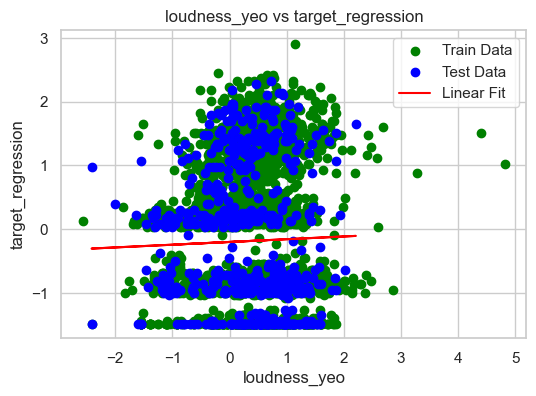


Feature: is_instrumental
Slope: [-0.69801685]
Intercept: [-0.08859976]
Mean absolute error: 0.93
Residual sum of squares (MSE): 1.19
R2-score: 0.03


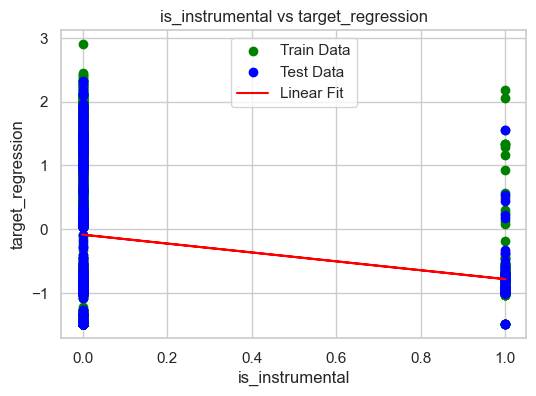


Feature: is_dance_hit
Slope: [0.]
Intercept: [-0.18648526]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


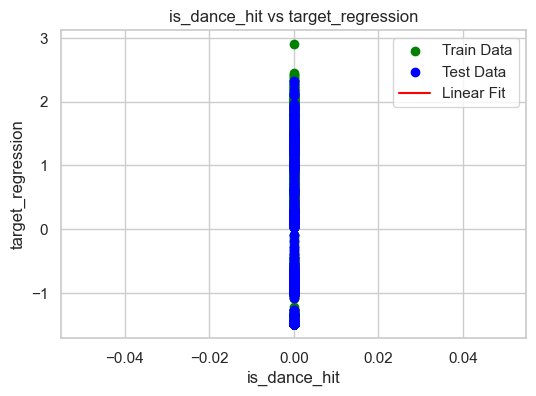


Feature: temp_zscore
Slope: [0.04154041]
Intercept: [-0.18425449]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


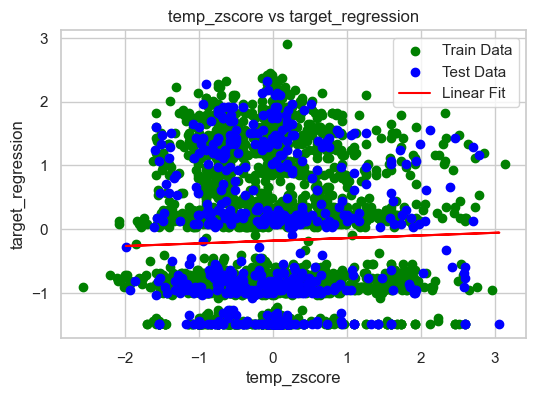


Feature: resonance_factor
Slope: [0.00445162]
Intercept: [-0.18660378]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


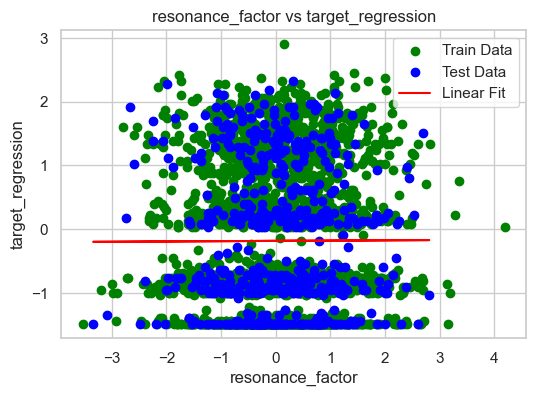


Feature: timbre_index
Slope: [-0.10833935]
Intercept: [-0.13289829]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.01


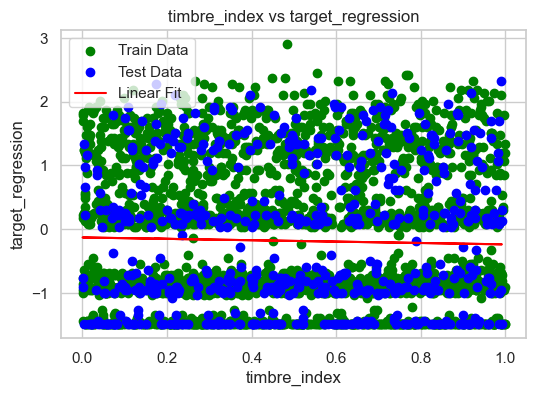


Feature: echo_constant
Slope: [0.]
Intercept: [-0.18648526]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


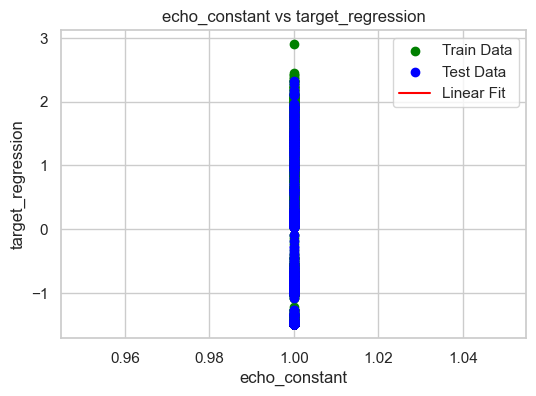


Feature: distorted_movement
Slope: [0.02352829]
Intercept: [-0.18675738]
Mean absolute error: 0.98
Residual sum of squares (MSE): 1.23
R2-score: -0.00


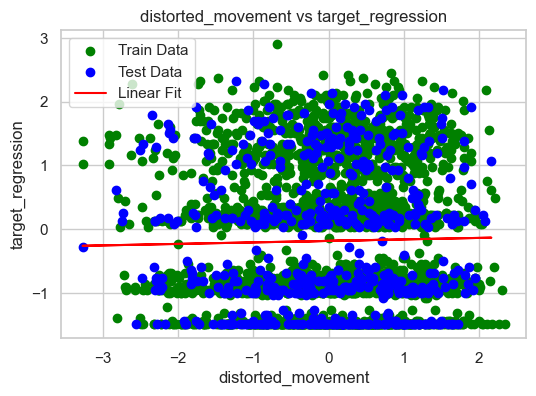


Feature: signal_power
Slope: [-1.125669]
Intercept: [0.68198862]
Mean absolute error: 0.91
Residual sum of squares (MSE): 1.14
R2-score: 0.07


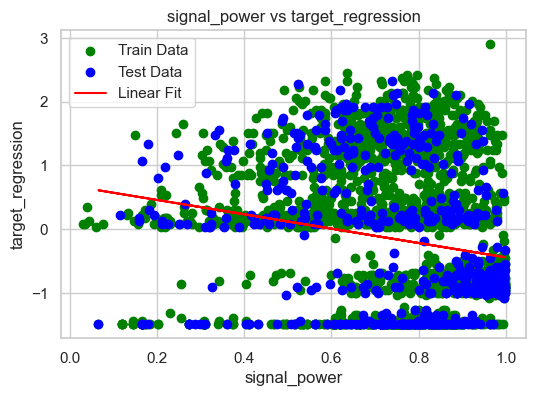

Best Predictor: artists_avg_popularity


In [84]:
target_col = 'target_regression'
best_r2 = 0
best_predictor = ''

for feature_col in predictors:
    X = df[[feature_col]].values 
    y = df[[target_col]].values  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr_model = lr.fit(X_train, y_train)

    predictions = lr_model.predict(X_test)
    
    slr_error = y_test - predictions

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    if r2 > best_r2:
        best_r2 = r2
        best_predictor = feature_col
    
    print(f"\nFeature: {feature_col}")
    print("Slope:", lr_model.coef_[0])
    print("Intercept:", lr_model.intercept_)
    print("Mean absolute error: %.2f" % mae)
    print("Residual sum of squares (MSE): %.2f" % mse)
    print("R2-score: %.2f" % r2)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_train, y_train, color='green', label='Train Data')
    plt.scatter(X_test, y_test, color='blue', label='Test Data')
    plt.plot(X_test, predictions, color='red', label='Linear Fit')
    plt.title(f'{feature_col} vs {target_col}')
    plt.xlabel(feature_col)
    plt.ylabel(target_col)
    plt.legend()
    plt.show()

print("Best Predictor:", best_predictor)

#### Multiple Linear Regression

### Methods Application - Classification

#### Holdout Method

In [25]:
X = df.drop(columns = ['target_class'])
# y -> variável alvo -> target_class
y = df['target_class']

# One-hot
# converter colunas categóricas em dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# Divisão dos dados 70/30 -> 70% treino + 30% teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0, stratify=y)

reports = {}

# Logistic Regression
log_regression_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
log_regression_model.fit(X_train, y_train)
y_pred_log_reg = log_regression_model.predict(X_test)

# Imprimir o relatório para Logistic Regression
reports['Holdout LR'] = classification_report(y_test, y_pred_log_reg, output_dict=True)
print('\nClassification Report for Holdout logistic Regression: \n', classification_report(y_test, y_pred_log_reg))

#-------------------------------#
# Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)

reports['Holdout LDA'] = classification_report(y_test, y_pred_lda, output_dict=True)
print("\nClassification Report for Holdout LDA:\n", classification_report(y_test, y_pred_lda))

#-------------------------------#
# Quadratic Discriminant Analysis (LDA)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)

reports['Holdout QDA'] = classification_report(y_test, y_pred_qda, output_dict=True)
print("\nClassification Report for Holdout QDA:\n", classification_report(y_test, y_pred_qda))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report for Holdout logistic Regression: 
               precision    recall  f1-score   support

   class_108       0.82      0.79      0.81       300
    class_31       0.81      0.83      0.82       300
    class_43       0.98      0.99      0.98       300

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900


Classification Report for Holdout LDA:
               precision    recall  f1-score   support

   class_108       0.78      0.74      0.76       300
    class_31       0.75      0.81      0.78       300
    class_43       0.99      0.97      0.98       300

    accuracy                           0.84       900
   macro avg       0.84      0.84      0.84       900
weighted avg       0.84      0.84      0.84       900



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Classification Report for Holdout QDA:
               precision    recall  f1-score   support

   class_108       0.75      0.63      0.69       300
    class_31       0.57      0.88      0.69       300
    class_43       0.81      0.48      0.60       300

    accuracy                           0.67       900
   macro avg       0.71      0.67      0.66       900
weighted avg       0.71      0.67      0.66       900



--------------------
#### Analysis of Holdout Method results
1. Os dados foram divididos por holdout em 70% treino/ 30% teste;
2. Métricas utilizadas: accuracy, precision, recall, F1-score.

*Classification Report for Holdout Logistic Regression:* 
- Accuracy of the model = 0.87

  *class_108:*
  - Precision = 0.82 // Recall = 0.79 // f1-score = 0.81
  - Identificação de 79% das amostras; 82% de exatidão nas previsões desta classe
  - Classe mais complexa.


  *class_31:*
  - Precision = 0.81 // Recall = 0.83 // f1-score = 0.82
  - Identificação de 83% das amostras; 81% de exatidão nas previsões.
  - Desempenho superior  ao da class_108, no entanto é também uma classe complexa;


  *class_43:*
  - Precision = 0.98 // Recall = 0.99 // f1-score = 0.98
  - Identificação de 99% das amostras; 98% de exatidão na previsões.
  - Modelo praticamente perfeito


#### Cross Validation (with k=5 and k=10)

In [5]:
k_folds_5 = KFold(n_splits=5)
k_folds_5 = KFold(n_splits=10)

#### Leave one out cross validation

#### Bootstrap

### Feature Selection 